In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv('D:\_MLOPS_project\end-end-housing-price-prediction-dataset\Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [134]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [135]:
df.duplicated().sum()

0

(array([19., 42., 79., 84., 88., 51., 47., 42., 28., 18., 12., 13.,  9.,
         4.,  3.,  1.,  1.,  0.,  3.,  1.]),
 array([ 1750000.,  2327500.,  2905000.,  3482500.,  4060000.,  4637500.,
         5215000.,  5792500.,  6370000.,  6947500.,  7525000.,  8102500.,
         8680000.,  9257500.,  9835000., 10412500., 10990000., 11567500.,
        12145000., 12722500., 13300000.]),
 <BarContainer object of 20 artists>)

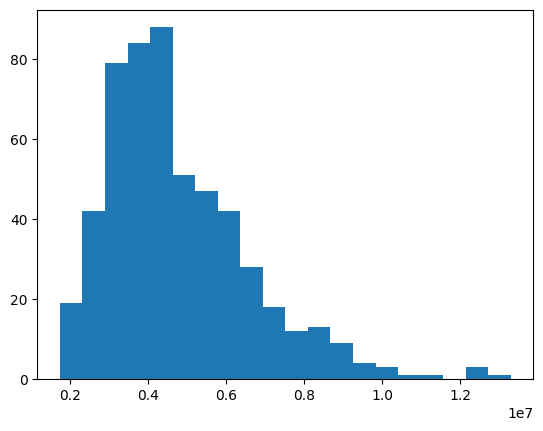

In [136]:
plt.hist(df['price'],bins=20)

In [137]:
df.groupby("furnishingstatus")["price"].mean().sort_values(ascending=False)

furnishingstatus
furnished         5.495696e+06
semi-furnished    4.907524e+06
unfurnished       4.013831e+06
Name: price, dtype: float64

In [138]:
df["furnishingstatus"].value_counts().sort_values(ascending=False)

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

Text(0, 0.5, 'price')

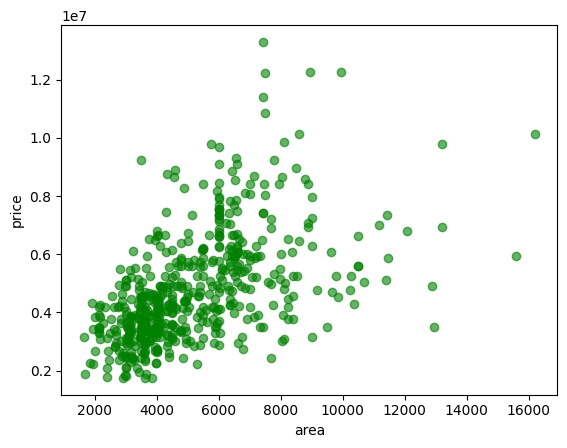

In [139]:
plt.scatter(df['area'],df['price'],color="green",alpha=0.6)
plt.xlabel("area")
plt.ylabel('price')

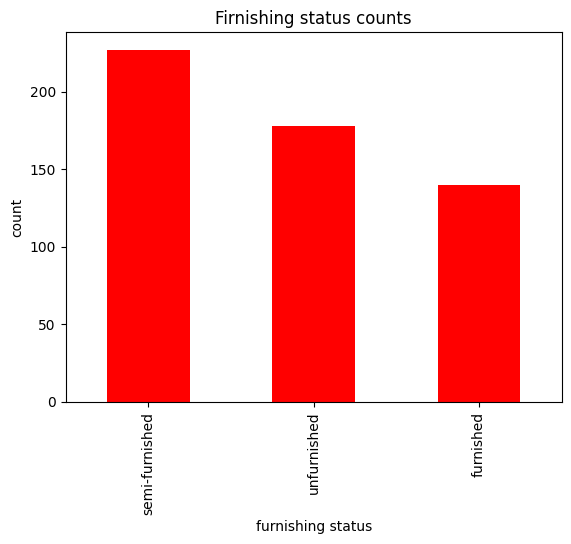

In [140]:
df['furnishingstatus'].value_counts().plot(kind="bar",color="red")
plt.title("Firnishing status counts")
plt.xlabel("furnishing status")
plt.ylabel("count")
plt.show()

In [141]:
df['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [142]:
df['bedrooms'].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

In [143]:
df['hotwaterheating'].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [144]:
df['airconditioning'].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

<Axes: >

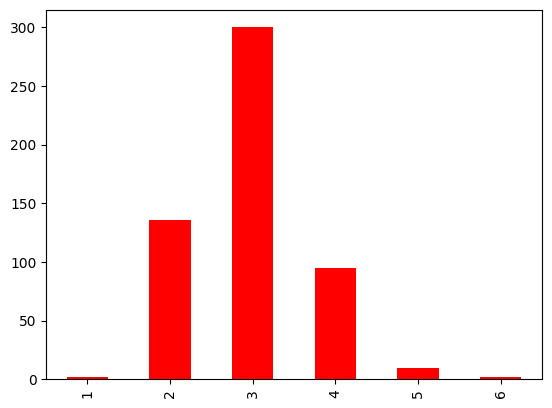

In [145]:
df['bedrooms'].value_counts().sort_index().plot(kind="bar",color="red")

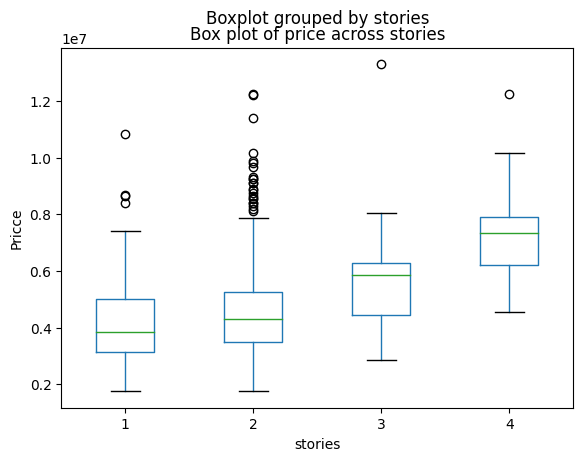

In [146]:
df.boxplot(column="price",by="stories",grid=False)
plt.title("Box plot of price across stories")
plt.xlabel("stories")
plt.ylabel("Pricce")
plt.show()

In [147]:
df.groupby("guestroom")["price"].mean()

guestroom
no     4.544546e+06
yes    5.792897e+06
Name: price, dtype: float64

In [148]:
df.groupby("basement")['area'].max()

basement
no     16200
yes    13200
Name: area, dtype: int64

In [149]:
df.groupby("airconditioning")['price'].median()

airconditioning
no     3885000.0
yes    5757500.0
Name: price, dtype: float64

In [150]:
df.groupby("mainroad")["price"].min()

mainroad
no     1750000
yes    1750000
Name: price, dtype: int64

Text(0, 0.5, 'avg price')

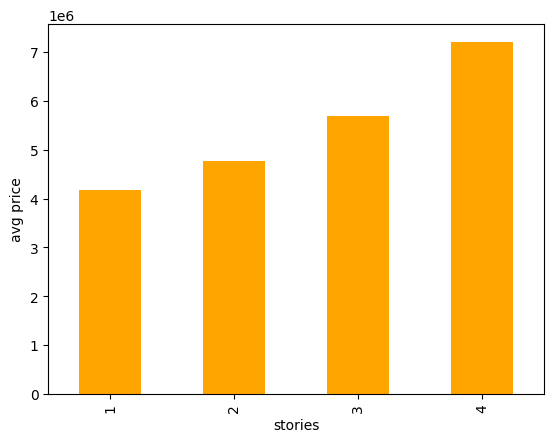

In [151]:
df.groupby("stories")["price"].mean().plot(kind="bar",color="orange")
plt.ylabel("avg price")

In [152]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
x=df[["area","stories","bedrooms","bathrooms","airconditioning","parking","prefarea","furnishingstatus"]]

In [173]:
x.head()

,area,stories,bedrooms,bathrooms,airconditioning,parking,prefarea,furnishingstatus
0,7420,3,4,2,1,2,1,0
1,8960,4,4,4,1,3,0,0
2,9960,2,3,2,0,2,1,1
3,7500,2,4,2,1,3,1,0
4,7420,2,4,1,1,2,0,0


In [178]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(df[categorical_cols])



In [182]:
encoded_data

<545x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3815 stored elements in Compressed Sparse Row format>

In [184]:
correlation_with_price = df.corr()['price']

In [185]:
correlation_with_price

price               1.000000
area                0.535997
bedrooms            0.366494
bathrooms           0.517545
stories             0.420712
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
airconditioning     0.452954
parking             0.384394
prefarea            0.329777
furnishingstatus   -0.304721
Name: price, dtype: float64

we will excluding feature having corelation b/w -0.3 to 0.3

In [159]:
x=df[["area","stories","bedrooms","bathrooms","airconditioning","parking","prefarea","furnishingstatus"]]

In [160]:
y=df[['price']]

In [161]:
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [162]:
x

,area,stories,bedrooms,bathrooms,airconditioning,parking,prefarea,furnishingstatus
0,7420,3,4,2,1,2,1,0
1,8960,4,4,4,1,3,0,0
2,9960,2,3,2,0,2,1,1
3,7500,2,4,2,1,3,1,0
4,7420,2,4,1,1,2,0,0
...,...,...,...,...,...,...,...,...
540,3000,1,2,1,0,2,0,2
541,2400,1,3,1,0,0,0,1
542,3620,1,2,1,0,0,0,2
543,2910,1,3,1,0,0,0,0


In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [164]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [165]:
import numpy as np

In [166]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
def model_result(predictions):
    print("Mean absolute error of model is {}".format(mean_absolute_error(y_test,predictions)))
    print("root mean squar errer is {}".format(np.sqrt(mean_squared_error(y_test,predictions))))
    print("Mean absolute error of model is {}".format(mean_absolute_percentage_error(y_test,predictions)))


In [167]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(scaled_x_train,y_train)
predslr = lr.predict(scaled_x_test)
model_result(predslr)

Mean absolute error of model is 898375.8385885922
root mean squar errer is 1232320.023929222
Mean absolute error of model is 0.19002809272594934


In [168]:
from xgboost import XGBRegressor
# Train an XGBoost model
model = XGBRegressor()
model.fit(scaled_x_train, y_train)
y_pred = model.predict(scaled_x_test)
predxgboost = model.predict(scaled_x_test)
model_result(predxgboost)

Mean absolute error of model is 1201010.8211009174
root mean squar errer is 1731869.888174459
Mean absolute error of model is 0.23075703264455466


In [169]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(scaled_x_train, y_train)
predRandomForestRegression = model.predict(scaled_x_test)
model_result(predRandomForestRegression)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean absolute error of model is 914699.1706422019
root mean squar errer is 1310902.1583322675
Mean absolute error of model is 0.19197097363547172


In [170]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(scaled_x_train, y_train)
predDecisiontree = model.predict(scaled_x_test)
model_result(predDecisiontree)

Mean absolute error of model is 1195105.504587156
root mean squar errer is 1732898.2491026758
Mean absolute error of model is 0.2532894120958739
